<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Projects/BDS35_27SEP_Stock_Projecct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/Stock_data.csv')
df.head(20)

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
5,12.12.2012 20:00:00.000,12511.1400,1.238205,1.239455,1.237810,1.238975
6,13.12.2012 00:00:00.000,13014.5603,1.238950,1.239780,1.237800,1.239665
7,13.12.2012 04:00:00.000,13104.6699,1.239685,1.240975,1.239360,1.239555
8,13.12.2012 08:00:00.000,28629.3398,1.239555,1.241140,1.237085,1.238270
9,13.12.2012 12:00:00.000,32854.7207,1.238275,1.240950,1.237255,1.240745


In [ ]:
df.describe()

,Volume,Open,High,Low,Close
count,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000
mean,29014.175556,1.514708,1.517335,1.512154,1.514732
std,17843.654391,0.102200,0.102464,0.101944,0.102169
min,134.520000,1.222615,1.224210,1.221960,1.222610
25%,17210.999925,1.447485,1.449649,1.444890,1.447521
50%,26378.719950,1.511850,1.514432,1.509107,1.511840
75%,37049.835225,1.597220,1.599684,1.594647,1.597216
max,531217.757800,1.960310,1.980145,1.885615,1.960280


In [ ]:
df.isnull().sum()

Gmt time    0
Volume      0
Open        0
High        0
Low         0
Close       0
dtype: int64

In [ ]:
df.shape

(12890, 6)

In [ ]:
#1) A 12-period EMA and 26-period EMA are two moving averages. Calculate them and plot These two with Close price in a line chart

### Calculate and plot two EMAs
A 12-period EMA and 26-period EMA are two moving averages used in calculating a more complex indicator called MACD (Moving Average Convergence Divergence). The MACD turns two EMAs into a momentum indicator by subtracting the longer EMA from the shorter one. Before learning more about MACD, you want to get familiar with its components first. You decide to calculate two EMAs using the Google daily stock prices and plot them in one chart.

Please, enter start date (YYYY/MM/DD): 12/12/2012
Please, enter end date (YYYY/MM/DD): 30/12/2012


<ipython-input-436-527ae1b32ec2>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]


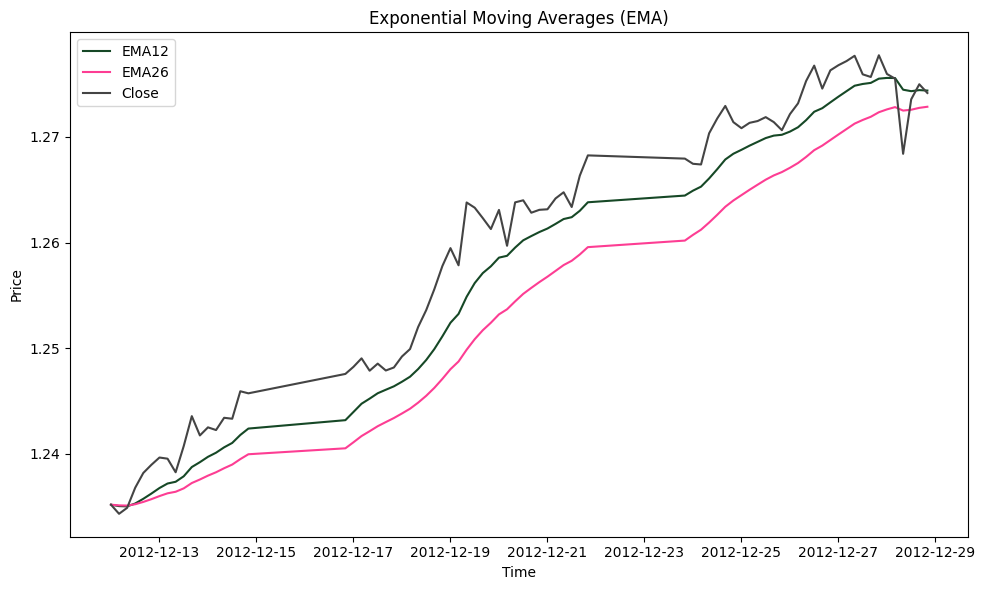

In [ ]:
df['Gmt time'] = pd.to_datetime(df['Gmt time'], errors='coerce')

start_date = input("Please, enter start date (YYYY/MM/DD): ")
end_date = input("Please, enter end date (YYYY/MM/DD): ")

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

ema_12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(10, 6))

plt.plot(filtered_df['Gmt time'], ema_12, color='#164826', label='EMA12')
plt.plot(filtered_df['Gmt time'], ema_26, color='#fd3d93', label='EMA26')
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='#444444', label='Close')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Exponential Moving Averages (EMA)')

plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
# 2) Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA are two moving averages. Calculate them and plot These two with Close price in a line chart

# a)  compare SMA 12 EMA 12 and CLOSE

# b) compare SMA 26 EMA 26 and CLOSE

### SMA vs. EMA
SMA and EMA are both commonly-used trend indicators. SMA gives equal weight to all data points, while EMA applies more weight to recent data points. You have some Google stock price data and want to decide on a moving average indicator to use. You plan to calculate both the SMA and EMA with the same lookback period and plot them in one chart.

SMA12 vs. EMA12

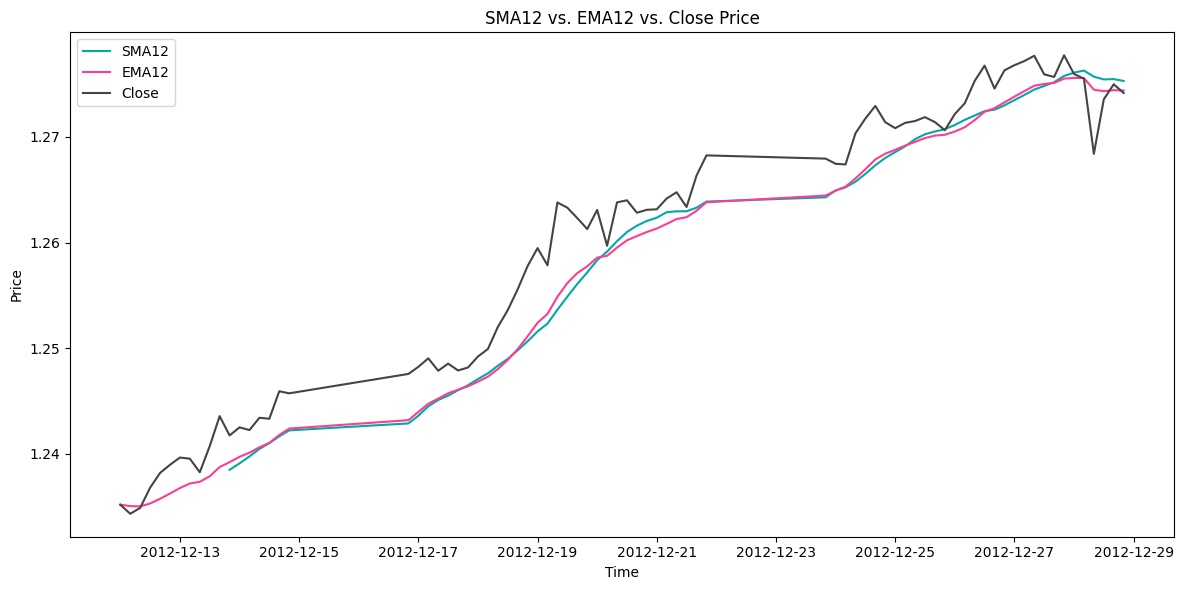

In [ ]:
start_date = '2012-12-12'
end_date = '2012-12-30'

sma_12 = filtered_df['Close'].rolling(window=12).mean()
ema_12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()

plt.figure(figsize=(12, 6))

plt.plot(filtered_df['Gmt time'], sma_12, color='#00A9A5', label='SMA12')
plt.plot(filtered_df['Gmt time'], ema_12, color='#fd3d93', label='EMA12')
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='#444444', label='Close')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('SMA12 vs. EMA12 vs. Close Price')

plt.legend()

plt.tight_layout()

plt.show()

SMA26 vs. EMA26

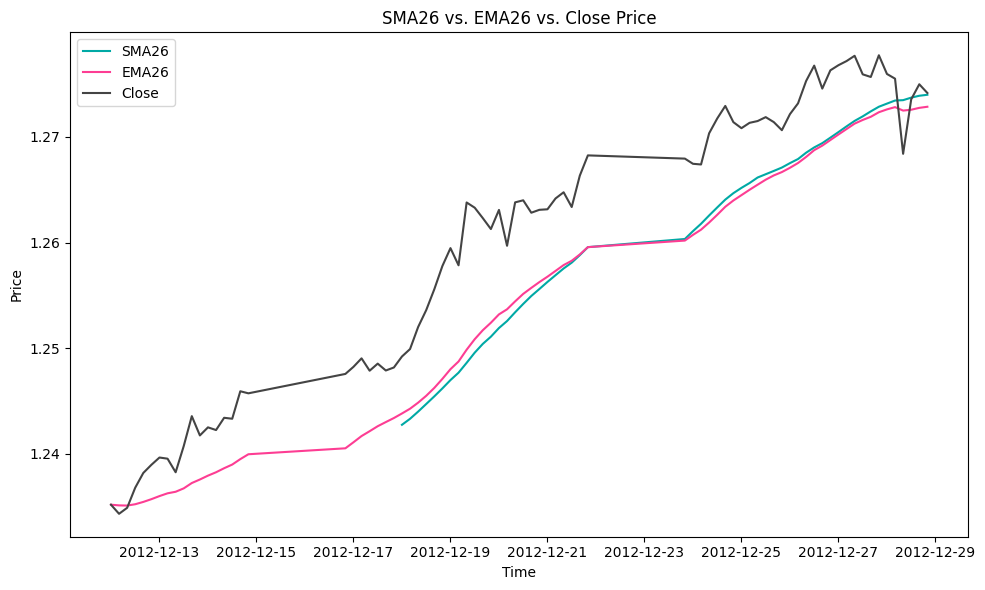

In [ ]:
start_date = '2012-12-12'
end_date = '2012-12-30'

sma_26 = filtered_df['Close'].rolling(window=26).mean()
ema_26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(10, 6))

plt.plot(filtered_df['Gmt time'], sma_26, color='#00A9A5', label='SMA26')
plt.plot(filtered_df['Gmt time'], ema_26, color='#fd3d93', label='EMA26')
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='#444444', label='Close')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('SMA26 vs. EMA26 vs. Close Price')

plt.legend()

plt.tight_layout()

plt.show()


In [ ]:
# 3) calculate MACD between EMA 26 and EMA 12 Plot line chart showing EMA 26 and EMA 12 and MACD

MACD between EMA26 and EMA12

In [ ]:
df

,Gmt time,Volume,Open,High,Low,Close
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,2020-11-12 04:00:00,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,2020-11-12 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,2020-11-12 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,2020-11-12 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.607315


In [ ]:
start_date = '2012-12-12'
end_date = '2012-12-30'

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

ema_26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()
ema_12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()

# Calculate MACD
macd = ema_26 - ema_12

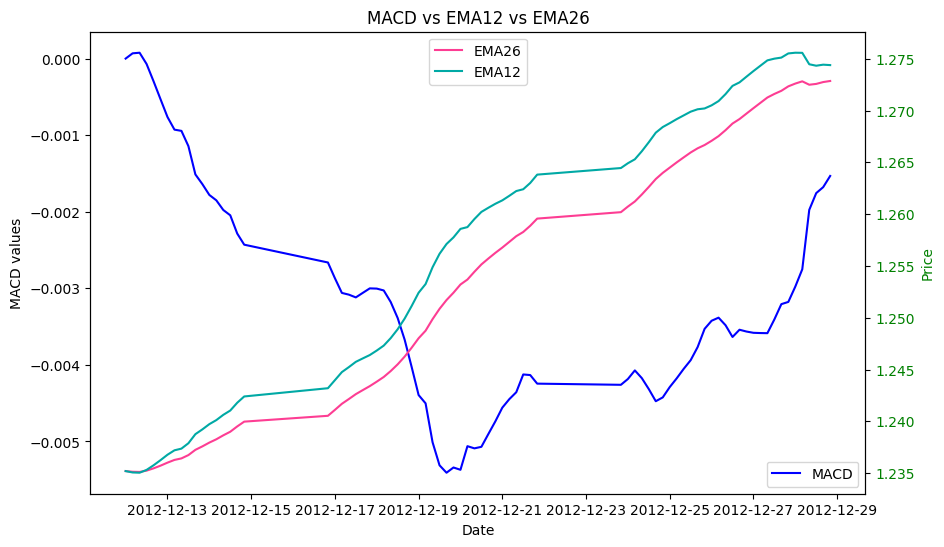

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Gmt time'], macd, label='MACD', color='blue')
plt.title('MACD vs EMA12 vs EMA26')
plt.xlabel('Date')
plt.ylabel('MACD values')
plt.legend(loc='lower right')

# Create a secondary y-axis
ax2 = plt.gca().twinx()

# Plot EMAs on the secondary y-axis
ax2.plot(filtered_df['Gmt time'], ema_26, label='EMA26', color='#fd3d93')
ax2.plot(filtered_df['Gmt time'], ema_12, label='EMA12', color='#00A9A5')
ax2.set_ylabel('Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.legend(loc='upper center')

plt.show()

A 12-period EMA and 26-period EMA are two moving averages used in calculating a more complex indicator called MACD (Moving Average Convergence Divergence). The MACD turns two EMAs into a momentum indicator by subtracting the longer EMA from the shorter one. Before learning more about MACD, you want to get familiar with its components first. You decide to calculate two EMAs using the Google daily stock prices and plot them in one chart.

## Strength Indicators: ADX

### Calculate the ADX
The average directional movement index (ADX) was developed by J. Welles Wilder as an indicator of trend strength. It combines two other indicators, the plus directional index (+DI) and minus directional indicator (-DI), and is obtained using lengthy calculations. However, with Python, you can calculate it with one line of code. In this exercise, you will implement your first ADX indicator using daily price data of the Tesla stock.

In [ ]:
pip install pandas-ta

In [ ]:
import pandas as pd
import pandas_ta as ta

In [ ]:
start_date = '20-12-2013'
end_date = '30-12-2013'

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

result_ta = ta.adx(filtered_df['High'],filtered_df['Low'], filtered_df['Close'], timeperiod=14)

df2 = filtered_df.join(result_ta)
df2

<ipython-input-459-650145900329>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]


,Gmt time,Volume,Open,High,Low,Close,ADX_14,DMP_14,DMN_14
1651,2013-12-20 00:00:00,19750.0103,1.541040,1.541890,1.535240,1.537330,NaN,NaN,NaN
1652,2013-12-20 04:00:00,16930.9499,1.537330,1.538770,1.534400,1.537030,NaN,NaN,NaN
1653,2013-12-20 08:00:00,22178.2803,1.537040,1.540405,1.536425,1.540145,NaN,NaN,NaN
1654,2013-12-20 12:00:00,38536.0000,1.540150,1.541170,1.532645,1.533570,NaN,NaN,NaN
1655,2013-12-20 16:00:00,18841.4002,1.533550,1.534565,1.531480,1.533055,NaN,NaN,NaN
1656,2013-12-20 20:00:00,5127.1900,1.533070,1.533340,1.530615,1.532545,NaN,NaN,NaN
1657,2013-12-22 20:00:00,3136.3798,1.532620,1.533520,1.531585,1.533115,NaN,NaN,NaN
1658,2013-12-23 00:00:00,10173.7398,1.533080,1.534250,1.531460,1.532375,NaN,NaN,NaN
1659,2013-12-23 04:00:00,10484.9901,1.532425,1.532910,1.529140,1.532395,NaN,NaN,NaN
1660,2013-12-23 08:00:00,21679.8398,1.532440,1.532820,1.530135,1.530620,NaN,NaN,NaN


### Visualize the ADX
The ADX can quantify the strength of a trend, but does not suggest the bullish or bearish trend direction. Typically an ADX value above 25 indicates that a trending market is present. To better understand it, you will calculate the ADX and plot it along with the price data.

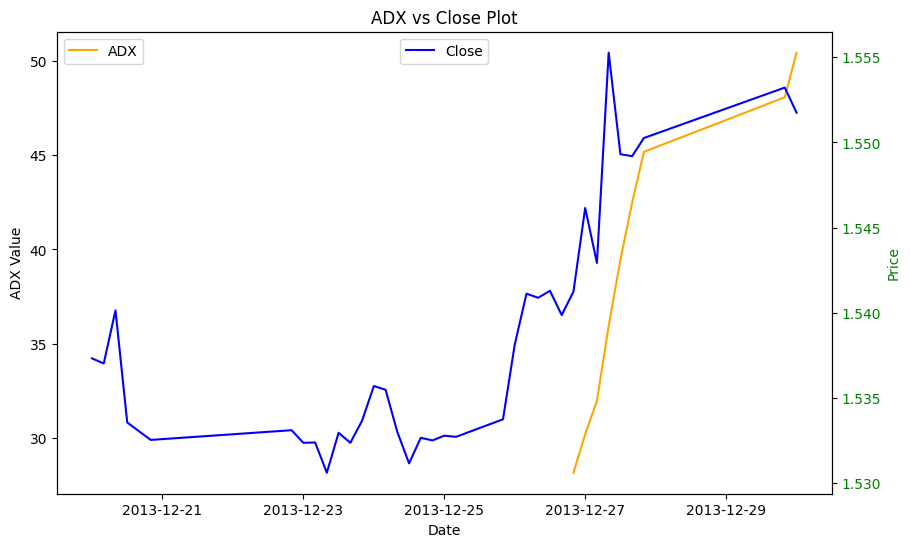

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(filtered_df['Gmt time'], df2['ADX_14'], label='ADX', color='orange')
plt.title('ADX vs Close Plot')
plt.xlabel('Date')
plt.ylabel('ADX Value')
plt.legend()


# Create a secondary y-axis
ax2 = plt.gca().twinx()

# Plot EMAs on the secondary y-axis
ax2.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close', color='blue')
ax2.set_ylabel('Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.legend(loc= 'upper center')
plt.show()


## Momentum Indicators: RSI

### Calculate the RSI
The RSI calculation follows a straightforward formula. RS, or Relative Strength, is the average of upward price changes in a chosen n periods, divided by the average of downward price changes over those n periods.

$ RSI = 100 - 100/(1 + RS)$

Where: RS = average of upward price changes / average of downward price changes

All these calculations can be handled in Python with one line of code. In this exercise, you will do your first RSI calculation using historical daily price data.

In [ ]:
filtered_df['RSI12'] = ta.rsi(filtered_df['Close'], length=12)
filtered_df

<ipython-input-461-abca60559a6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RSI12'] = ta.rsi(filtered_df['Close'], length=12)


,Gmt time,Volume,Open,High,Low,Close,RSI12
1651,2013-12-20 00:00:00,19750.0103,1.541040,1.541890,1.535240,1.537330,NaN
1652,2013-12-20 04:00:00,16930.9499,1.537330,1.538770,1.534400,1.537030,NaN
1653,2013-12-20 08:00:00,22178.2803,1.537040,1.540405,1.536425,1.540145,NaN
1654,2013-12-20 12:00:00,38536.0000,1.540150,1.541170,1.532645,1.533570,NaN
1655,2013-12-20 16:00:00,18841.4002,1.533550,1.534565,1.531480,1.533055,NaN
1656,2013-12-20 20:00:00,5127.1900,1.533070,1.533340,1.530615,1.532545,NaN
1657,2013-12-22 20:00:00,3136.3798,1.532620,1.533520,1.531585,1.533115,NaN
1658,2013-12-23 00:00:00,10173.7398,1.533080,1.534250,1.531460,1.532375,NaN
1659,2013-12-23 04:00:00,10484.9901,1.532425,1.532910,1.529140,1.532395,NaN
1660,2013-12-23 08:00:00,21679.8398,1.532440,1.532820,1.530135,1.530620,NaN


In [ ]:
filtered_df['RSI26'] = ta.rsi(filtered_df['Close'], length=26)
filtered_df

<ipython-input-462-75f198a3440d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RSI26'] = ta.rsi(filtered_df['Close'], length=26)


,Gmt time,Volume,Open,High,Low,Close,RSI12,RSI26
1651,2013-12-20 00:00:00,19750.0103,1.541040,1.541890,1.535240,1.537330,NaN,NaN
1652,2013-12-20 04:00:00,16930.9499,1.537330,1.538770,1.534400,1.537030,NaN,NaN
1653,2013-12-20 08:00:00,22178.2803,1.537040,1.540405,1.536425,1.540145,NaN,NaN
1654,2013-12-20 12:00:00,38536.0000,1.540150,1.541170,1.532645,1.533570,NaN,NaN
1655,2013-12-20 16:00:00,18841.4002,1.533550,1.534565,1.531480,1.533055,NaN,NaN
1656,2013-12-20 20:00:00,5127.1900,1.533070,1.533340,1.530615,1.532545,NaN,NaN
1657,2013-12-22 20:00:00,3136.3798,1.532620,1.533520,1.531585,1.533115,NaN,NaN
1658,2013-12-23 00:00:00,10173.7398,1.533080,1.534250,1.531460,1.532375,NaN,NaN
1659,2013-12-23 04:00:00,10484.9901,1.532425,1.532910,1.529140,1.532395,NaN,NaN
1660,2013-12-23 08:00:00,21679.8398,1.532440,1.532820,1.530135,1.530620,NaN,NaN


In [ ]:
filtered_df = calculate_rsi(filtered_df)
filtered_df

<ipython-input-390-34dd9a762484>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RSI'] = rsi


,Gmt time,Volume,Open,High,Low,Close,RSI12,RSI26,RSI
1651,2013-12-20 00:00:00,19750.0103,1.541040,1.541890,1.535240,1.537330,NaN,NaN,NaN
1652,2013-12-20 04:00:00,16930.9499,1.537330,1.538770,1.534400,1.537030,NaN,NaN,0.000000
1653,2013-12-20 08:00:00,22178.2803,1.537040,1.540405,1.536425,1.540145,NaN,NaN,91.215227
1654,2013-12-20 12:00:00,38536.0000,1.540150,1.541170,1.532645,1.533570,NaN,NaN,31.181181
1655,2013-12-20 16:00:00,18841.4002,1.533550,1.534565,1.531480,1.533055,NaN,NaN,29.652546
1656,2013-12-20 20:00:00,5127.1900,1.533070,1.533340,1.530615,1.532545,NaN,NaN,28.279619
1657,2013-12-22 20:00:00,3136.3798,1.532620,1.533520,1.531585,1.533115,NaN,NaN,31.808373
1658,2013-12-23 00:00:00,10173.7398,1.533080,1.534250,1.531460,1.532375,NaN,NaN,29.898580
1659,2013-12-23 04:00:00,10484.9901,1.532425,1.532910,1.529140,1.532395,NaN,NaN,30.012151
1660,2013-12-23 08:00:00,21679.8398,1.532440,1.532820,1.530135,1.530620,NaN,NaN,26.239377


### Visualize the RSI
The RSI is a momentum indicator that oscillates between 0 and 100. Typically an RSI over 70 indicates an overbought market condition, which means the asset is overvalued and the price may reverse. An RSI below 30 suggests an oversold market condition, which means the asset is undervalued and the price may rally. To better understand it, you will calculate the RSI and plot it along with the price data.

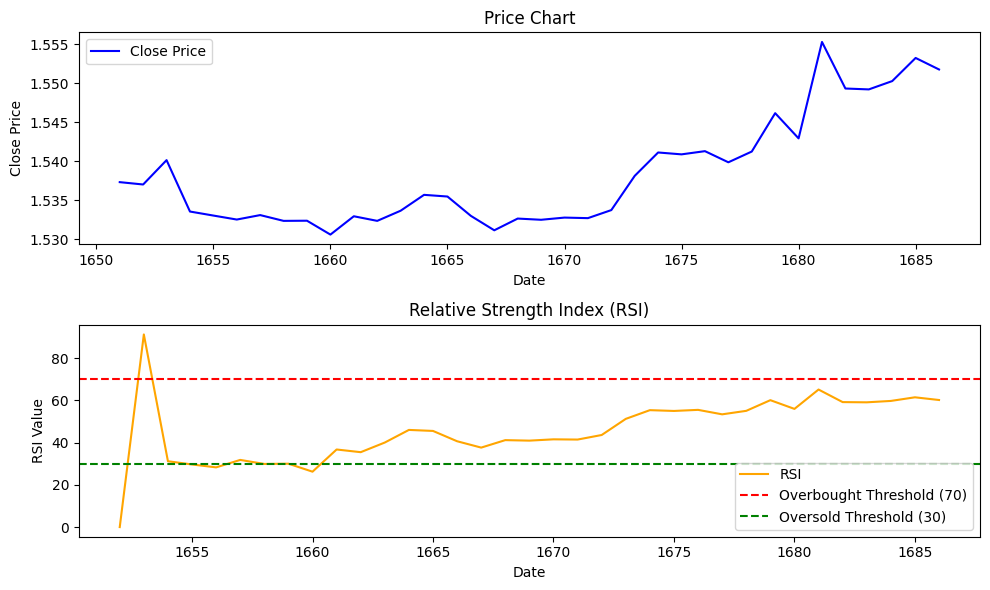

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(filtered_df['Close'], label='Close Price', color='blue')
plt.title('Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# RSI plot
plt.subplot(2, 1, 2)
plt.plot(filtered_df['RSI'], label='RSI', color='orange')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold Threshold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()

plt.tight_layout()
plt.show()

## Volatility Indicators: Bollinger Bands

### Implement Bollinger Bands
Bollinger Bands are envelopes plotted above and below a simple moving average of the price. Because the distance of the bands is based on the standard deviation, they adjust to volatility swings in the underlying price.

To better understand the impact of standard deviation specification on Bollinger bands, you will implement and plot two sets of Bollinger Bands on the same dataset.

In [ ]:
filtered_df.ta.bbands(append=True)
filtered_df.head(10)

<ipython-input-465-a92b876b0470>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.ta.bbands(append=True)
<ipython-input-465-a92b876b0470>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.ta.bbands(append=True)
<ipython-input-465-a92b876b0470>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,Gmt time,Volume,Open,High,Low,Close,RSI12,RSI26,RSI,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
1651,2013-12-20 00:00:00,19750.0103,1.541040,1.541890,1.535240,1.537330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652,2013-12-20 04:00:00,16930.9499,1.537330,1.538770,1.534400,1.537030,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1653,2013-12-20 08:00:00,22178.2803,1.537040,1.540405,1.536425,1.540145,NaN,NaN,91.215227,NaN,NaN,NaN,NaN,NaN
1654,2013-12-20 12:00:00,38536.0000,1.540150,1.541170,1.532645,1.533570,NaN,NaN,31.181181,NaN,NaN,NaN,NaN,NaN
1655,2013-12-20 16:00:00,18841.4002,1.533550,1.534565,1.531480,1.533055,NaN,NaN,29.652546,1.530985,1.536226,1.541467,0.682304,0.197474
1656,2013-12-20 20:00:00,5127.1900,1.533070,1.533340,1.530615,1.532545,NaN,NaN,28.279619,1.529467,1.535269,1.541071,0.755883,0.265270
1657,2013-12-22 20:00:00,3136.3798,1.532620,1.533520,1.531585,1.533115,NaN,NaN,31.808373,1.528790,1.534486,1.540182,0.742423,0.379656
1658,2013-12-23 00:00:00,10173.7398,1.533080,1.534250,1.531460,1.532375,NaN,NaN,29.898580,1.532076,1.532932,1.533788,0.111667,0.174607
1659,2013-12-23 04:00:00,10484.9901,1.532425,1.532910,1.529140,1.532395,NaN,NaN,30.012151,1.532051,1.532697,1.533343,0.084234,0.266082
1660,2013-12-23 08:00:00,21679.8398,1.532440,1.532820,1.530135,1.530620,NaN,NaN,26.239377,1.530532,1.532210,1.533888,0.219067,0.026302


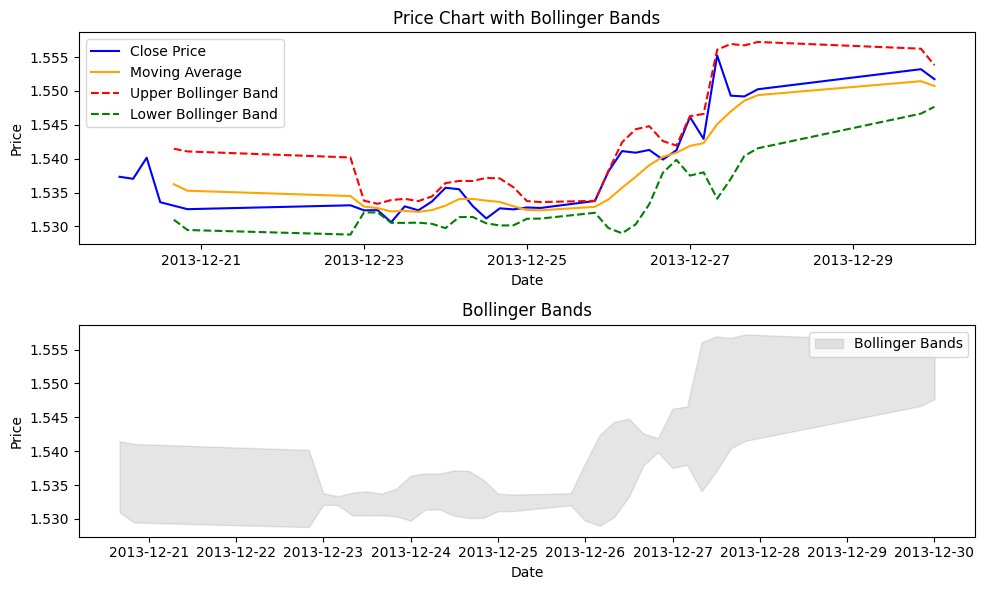

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['BBM_5_2.0'], label='Moving Average', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['BBU_5_2.0'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(filtered_df['Gmt time'], filtered_df['BBL_5_2.0'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.title('Price Chart with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Bollinger Bands plot
plt.subplot(2, 1, 2)
plt.fill_between(filtered_df['Gmt time'], filtered_df['BBU_5_2.0'], filtered_df['BBL_5_2.0'], color='gray', alpha=0.2, label='Bollinger Bands')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
filtered_df.tail(10)

,Gmt time,Volume,Open,High,Low,Close,RSI12,RSI26,RSI,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
1677,2013-12-26 16:00:00,5769.9898,1.541290,1.541650,1.539525,1.539870,63.781577,58.612009,53.395722,1.537916,1.540262,1.542608,0.304582,0.416442
1678,2013-12-26 20:00:00,7662.8700,1.539870,1.541915,1.537640,1.541245,67.131099,61.011846,55.048356,1.539831,1.540884,1.541937,0.136651,0.671445
1679,2013-12-27 00:00:00,16797.2102,1.541265,1.546665,1.540310,1.546155,75.836378,67.919893,60.100721,1.537504,1.541890,1.546276,0.568965,0.986161
1680,2013-12-27 04:00:00,19996.0197,1.546140,1.546195,1.541495,1.542930,63.740210,60.586875,55.968877,1.537983,1.542299,1.546615,0.559697,0.573098
1681,2013-12-27 08:00:00,33171.0796,1.542920,1.559755,1.542885,1.555265,78.229290,72.428074,65.136298,1.534089,1.545093,1.556097,1.424394,0.962191
1682,2013-12-27 12:00:00,33633.9395,1.555265,1.555305,1.547980,1.549310,64.628328,62.934694,59.187117,1.537019,1.546981,1.556943,1.287885,0.616898
1683,2013-12-27 16:00:00,21702.3193,1.549320,1.551815,1.547915,1.549195,64.392476,62.769455,59.082906,1.540403,1.548571,1.556739,1.054957,0.538196
1684,2013-12-27 20:00:00,5033.0501,1.549180,1.550560,1.548875,1.550260,65.658598,63.687704,59.739379,1.541541,1.549392,1.557243,1.013435,0.555279
1685,2013-12-29 20:00:00,5428.5300,1.552240,1.555805,1.551835,1.553220,69.000675,66.104180,61.458033,1.546653,1.551450,1.556247,0.618431,0.684478
1686,2013-12-30 00:00:00,15278.8096,1.553230,1.555470,1.551485,1.551745,65.533690,63.900411,60.177928,1.547671,1.550746,1.553821,0.396634,0.662418


In [ ]:

sma_12 = filtered_df['Close'].rolling(window=12).mean()
sma_26 = filtered_df['Close'].rolling(window=26).mean()
ema_12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()
macd = ema_26-ema_12
result_ta = ta.adx(filtered_df['High'],filtered_df['Low'], filtered_df['Close'], timeperiod=14)
df2 = filtered_df.join(result_ta)

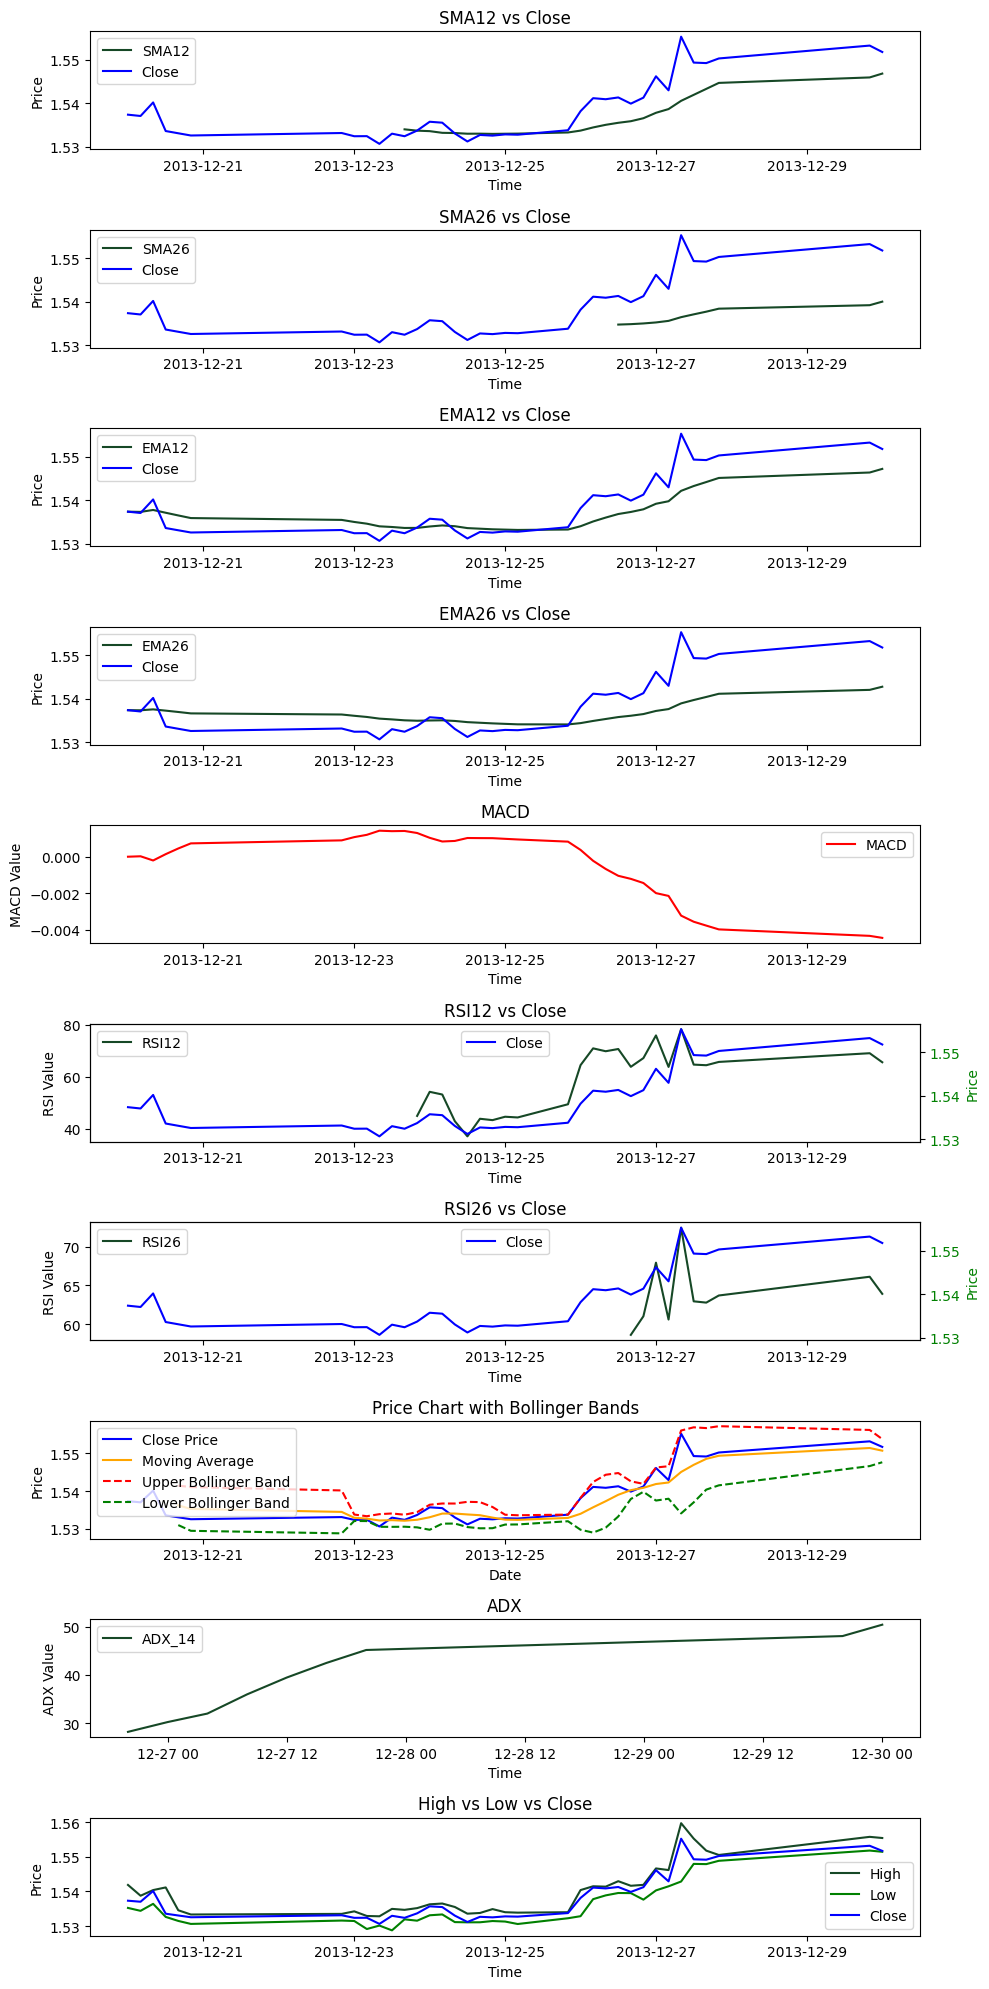

In [ ]:
plt.figure(figsize=(10, 20))

# Subplots for SMAs and EMAs vs Close
for i, (label, values) in enumerate([('SMA12', sma_12), ('SMA26', sma_26), ('EMA12', ema_12), ('EMA26', ema_26)], start=1):
    plt.subplot(10, 1, i)
    plt.plot(filtered_df['Gmt time'], values, color='#164826', label=label)
    plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='blue', label='Close')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'{label} vs Close')
    plt.legend()

# Subplot for MACD
plt.subplot(10, 1, 5)
plt.plot(filtered_df['Gmt time'], macd, color='red', label='MACD')
plt.xlabel('Time')
plt.ylabel('MACD Value')
plt.title('MACD')
plt.legend()

# Subplots for RSI 12 and RSI 26 vs Close
for i, label in enumerate(['RSI12', 'RSI26'], start=6):
    plt.subplot(10, 1, i)
    plt.plot(filtered_df['Gmt time'], filtered_df[label], color='#164826', label=label)
    plt.xlabel('Time')
    plt.ylabel('RSI Value')
    plt.title(f'{label} vs Close')
    plt.legend(loc= 'upper left')

    # Create a secondary y-axis for Close prices
    ax2 = plt.gca().twinx()
    ax2.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close', color='blue')
    ax2.set_ylabel('Price', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.legend(loc='upper center')

# Subplot for Bollinger Bands vs Close
plt.subplot(10, 1, 8)
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['BBM_5_2.0'], label='Moving Average', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['BBU_5_2.0'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(filtered_df['Gmt time'], filtered_df['BBL_5_2.0'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.title('Price Chart with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Subplot for ADX
plt.subplot(10, 1, 9)
plt.plot(df2['Gmt time'], df2['ADX_14'], color='#164826', label='ADX_14')
plt.xlabel('Time')
plt.ylabel('ADX Value')
plt.title('ADX')
plt.legend()

# Subplot for Close vs High vs Low
plt.subplot(10, 1, 10)
plt.plot(filtered_df['Gmt time'], filtered_df['High'], color='#164826', label='High')
plt.plot(filtered_df['Gmt time'], filtered_df['Low'], color='green', label='Low')
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='blue', label='Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('High vs Low vs Close')
plt.legend()

plt.tight_layout()
plt.show()

# plt.figure(figsize=(10, 20))

# # Subplot 1: SMA 12 vs Close
# plt.subplot(10, 1, 1)
# plt.plot(filtered_df['Gmt time'], sma_12, color='#164826', label='SMA12')
# plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='blue', label='Close')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('SMA12 vs Close')
# plt.legend()

# # Subplot 2: SMA 26 vs Close
# plt.subplot(10, 1, 2)
# plt.plot(filtered_df['Gmt time'], sma_26, color='#164826', label='SMA26')
# plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='blue', label='Close')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('SMA26 vs Close')
# plt.legend()

# # Subplot 3: EMA 12 vs Close
# plt.subplot(10, 1, 3)
# plt.plot(filtered_df['Gmt time'], ema_12, color='#164826', label='EMA12')
# plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='blue', label='Close')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('Exponential Moving Average 12 (EMA12) vs Close')
# plt.legend()

# # Subplot 4: EMA 26 vs Close
# plt.subplot(10, 1, 4)
# plt.plot(filtered_df['Gmt time'], ema_26, color='#fd3d93', label='EMA26')
# plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='blue', label='Close')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('Exponential Moving Average 26 (EMA26) vs Close')
# plt.legend()

# # Subplot 5: MACD
# plt.subplot(10, 1, 5)
# plt.plot(filtered_df['Gmt time'], macd, color='#444444', label='MACD')
# plt.xlabel('Time')
# plt.ylabel('MACD Value')
# plt.title('MACD')
# plt.legend()

# # Subplot 6: RSI 12 vs Close
# plt.subplot(10, 1, 6)
# plt.plot(filtered_df['Gmt time'], filtered_df['RSI12'], color='#164826', label='RSI12')
# plt.xlabel('Time')
# plt.ylabel('RSI Value')
# plt.title('RSI12 vs Close')
# plt.legend()

# # Create a secondary y-axis
# ax2 = plt.gca().twinx()

# ax2.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close', color='blue')
# ax2.set_ylabel('Price', color='green')
# ax2.tick_params(axis='y', labelcolor='green')
# plt.legend(loc= 'upper center')
# plt.show()

# # Subplot 7: RSI 26 vs Close
# plt.subplot(10, 1, 7)
# plt.plot(filtered_df['Gmt time'], filtered_df['RSI26'], color='#164826', label='RSI26')
# plt.xlabel('Time')
# plt.ylabel('RSI Value')
# plt.title('RSI26 vs Close')
# plt.legend()

# ax2 = plt.gca().twinx()

# ax2.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close', color='blue')
# ax2.set_ylabel('Price', color='green')
# ax2.tick_params(axis='y', labelcolor='green')
# plt.legend(loc= 'upper center')
# plt.show()

# # Subplot 8: Bollinger Bands vs Close
# plt.subplot(10, 1, 8)
# plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
# plt.plot(filtered_df['Gmt time'], filtered_df['BBM_5_2.0'], label='Moving Average', color='orange')
# plt.plot(filtered_df['Gmt time'], filtered_df['BBU_5_2.0'], label='Upper Bollinger Band', color='red', linestyle='--')
# plt.plot(filtered_df['Gmt time'], filtered_df['BBL_5_2.0'], label='Lower Bollinger Band', color='green', linestyle='--')
# plt.title('Price Chart with Bollinger Bands')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()

# # Subplot 9: ADX
# plt.subplot(10, 1, 9)
# plt.plot(df2['Gmt time'], df2['ADX_14'], color='#164826', label='ADX_14')
# plt.xlabel('Time')
# plt.ylabel('ADX Value')
# plt.title('ADX')
# plt.legend()

# # Subplot 10: Close vs High vs Low
# plt.subplot(10, 1, 10)
# plt.plot(filtered_df['Gmt time'], filtered_df['High'], color='#164826', label='High')
# plt.plot(filtered_df['Gmt time'], filtered_df['Low'], color='green', label='Low')
# plt.plot(filtered_df['Gmt time'], filtered_df['Close'], color='blue', label='Close')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('High vs Low vs Close')
# plt.legend()

# plt.tight_layout()
# plt.show()



